### 19MID0023 Saksham Verma

### Data Set Information:
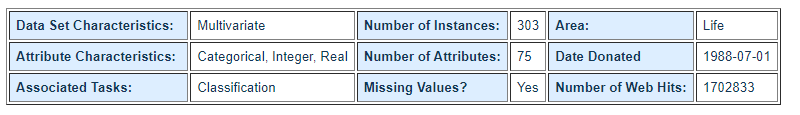

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Importing packages

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Reading Data

In [10]:
Saksham = pd.read_csv("heart.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Displaying Data

In [20]:
Saksham.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
Saksham.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


 ### Exploratory Data Analysis (EDA)

In [22]:
# To get the knowlege regarding the outliers and the type of data distribution
Saksham.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
## For knowing the number of rows and columns
Saksham.shape

(303, 14)

In [24]:
# To know regarding the datatype,Non-Null Count
Saksham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# This also tell whether the data being bais or inclined to one result
Saksham.target.value_counts()

1    165
0    138
Name: target, dtype: int64

#### As the amount of people with and without heart disease is comparable thus data is adquate to be used for generating the model

In [25]:
Saksham.target.value_counts().hvplot.bar(title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', width=500, height=350)

:Bars   [index]   (target)

In [26]:
# Checking for messing values
Saksham.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
# Name of columns
Saksham.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
cat_value = []
cont_val = []
for column in Saksham.columns:
    if len(Saksham[column].unique()) <= 10:
        cat_value.append(column)
    else:
        cont_val.append(column)

### Heart disease according to sex

In [37]:

diseased = Saksham.loc[Saksham['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.3) 
diseaseless = Saksham.loc[Saksham['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.3) 

(diseaseless * diseased).opts(
    title="Heart disease according to sex", xlabel='Sex', ylabel='count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

### Heart disease according to Chest Pain Type

In [35]:

diseased = Saksham.loc[Saksham['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.3) 
diseaseless = Saksham.loc[Saksham['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.3) 

(diseaseless * diseased).opts(
    title="Heart Disease - Chest Pain Type", xlabel='Pain Type', ylabel='count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

### Heart disease because of fasting blood sugar

In [40]:
diseased = Saksham.loc[Saksham['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
diseaseless = Saksham.loc[Saksham['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(diseaseless * diseased).opts(
    title="Heart disease because of fasting blood sugar", xlabel='fasting blood sugar>120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

### Heart Disease because of resting electrocardiographic

In [41]:
diseased = Saksham.loc[Saksham['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
diseaseless = Saksham.loc[Saksham['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(diseaseless * diseased).opts(
    title="Heart Disease because of resting electrocardiographic", xlabel='resting electrocardiographic', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

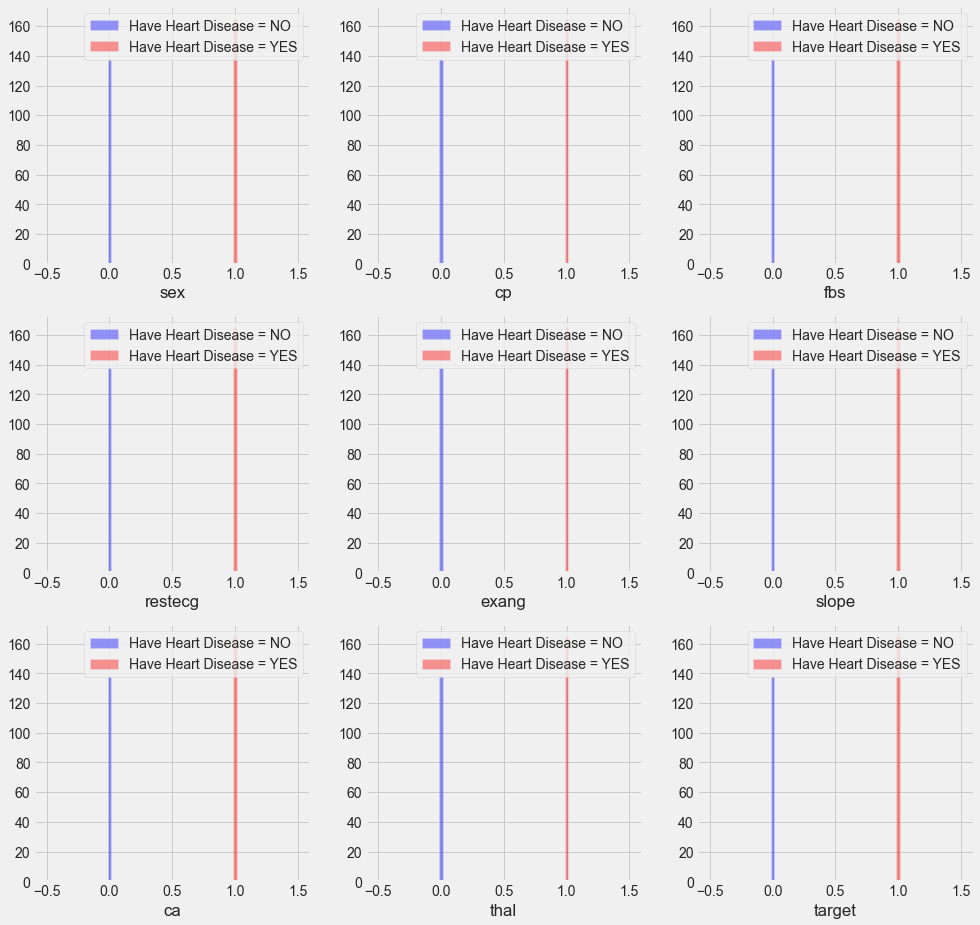

In [48]:
plt.figure(figsize=(15, 15))

for integ, col in enumerate(cat_value, 1):
    plt.subplot(3, 3,integ)
    Saksham[Saksham["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.4)
    Saksham[Saksham["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.4)
    plt.legend()
    plt.xlabel(col)

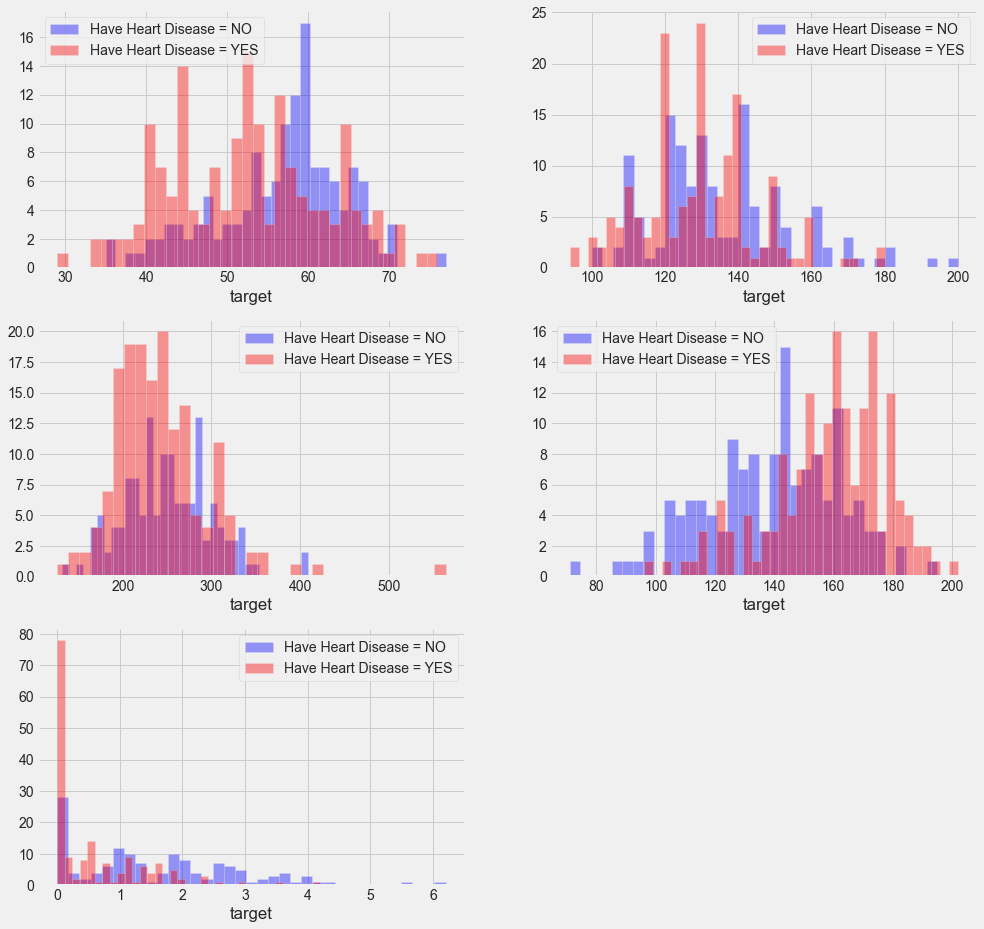

In [46]:
plt.figure(figsize=(15, 15))

for integ, col in enumerate(cont_val, 1):
    plt.subplot(3, 2, integ)
    Saksham[Saksham["target"] == 0][col].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.4)
    Saksham[Saksham["target"] == 1][col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.4)
    plt.legend()
    plt.xlabel(column)

### Max Heart Rate for Heart Disease vs Age

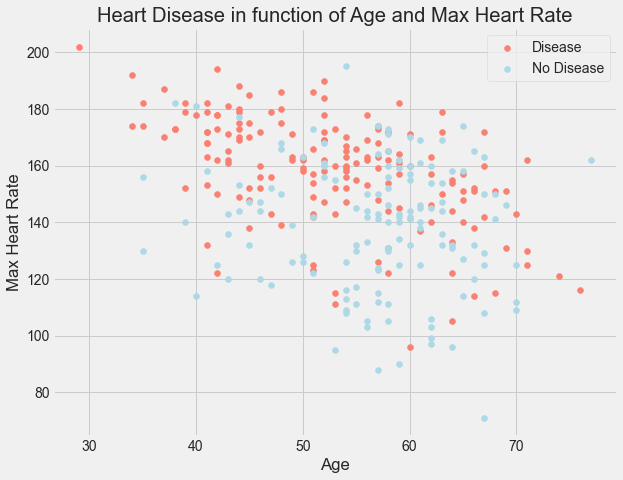

In [49]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(Saksham.age[Saksham.target==1],
            Saksham.thalach[Saksham.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(Saksham.age[Saksham.target==0],
            Saksham.thalach[Saksham.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Correlation Matrix

(14.5, -0.5)

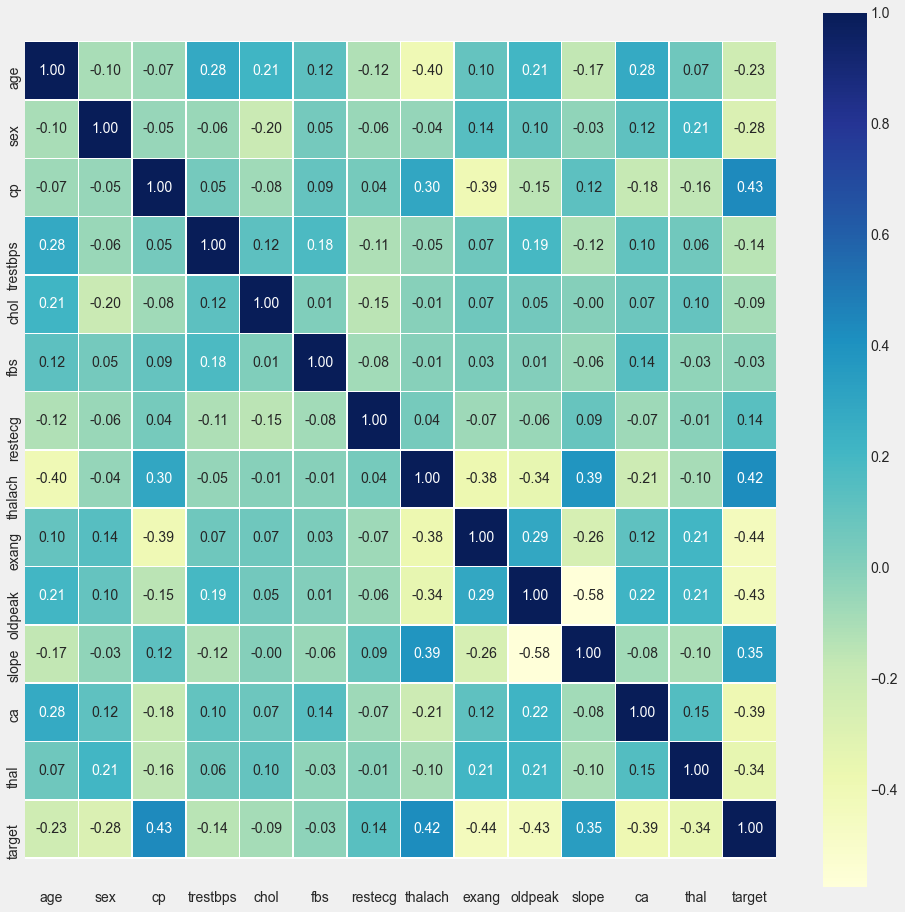

In [50]:
# Let's make our correlation matrix a little prettier
correlational_matrix = Saksham.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(correlational_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [52]:
Saksham.drop('target', axis=1).corrwith(Saksham.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

### Data Processing

In [61]:
dataset_mod = pd.get_dummies(Saksham, columns = cat_value)
cat_value.remove('target')

ValueError: list.remove(x): x not in list

In [62]:
print(Saksham.columns)
print(dataset_mod.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [63]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [66]:
from sklearn.model_selection import train_test_split

X = dataset_mod.drop('target', axis=1)
y = dataset_mod.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("**********TRAINING DATA**********")
pred = tree_model.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print(f"Error rate: {1-accuracy_score(y_train, pred):.2f}") 
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")        
print("TESTING DATA")
pred = tree_model.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("*************Test Result:************\n")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")        
print(f"Error rate: {1-accuracy_score(y_test, pred):.2f}")        
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**********TRAINING DATA**********
Train Result:

Accuracy Score: 100.00%
Error rate: 0.00
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

TESTING DATA
*************Test Result:************

Accuracy Score: 78.02%
Error rate: 0.22
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.723404   0.840909   0.78022   0.782157      0.787967
recall      0.829268   0.740000   0.78022   0.784634      0.780220
f1-score    0.772727   0.787234   0.78022   0.779981      0.780698
support    41.000000  50.000000   0.78022  91.000000     91.000000
Confusion Matrix: 
 [[34  7]
 [13 37]]

